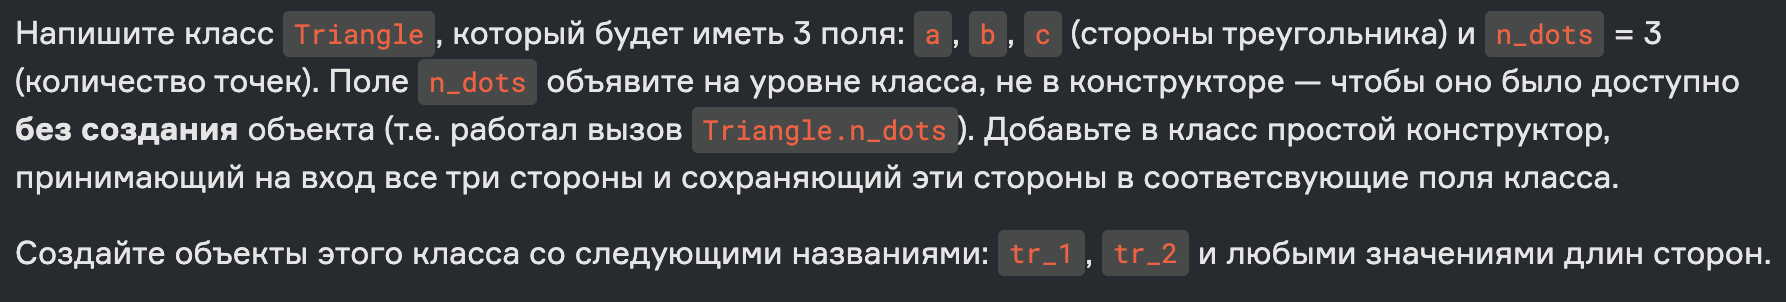

In [13]:
from dataclasses import dataclass

class Triangle_1:
    a: float
    b: float
    c: float
    n_dots = 3
    
    def __init__(self, a, b, c):
        self.a = a
        self.b = b
        self.c = c
        
tr_1 = Triangle_1(1, 2, 3)
tr_2 = Triangle_1(4, 5, 6)


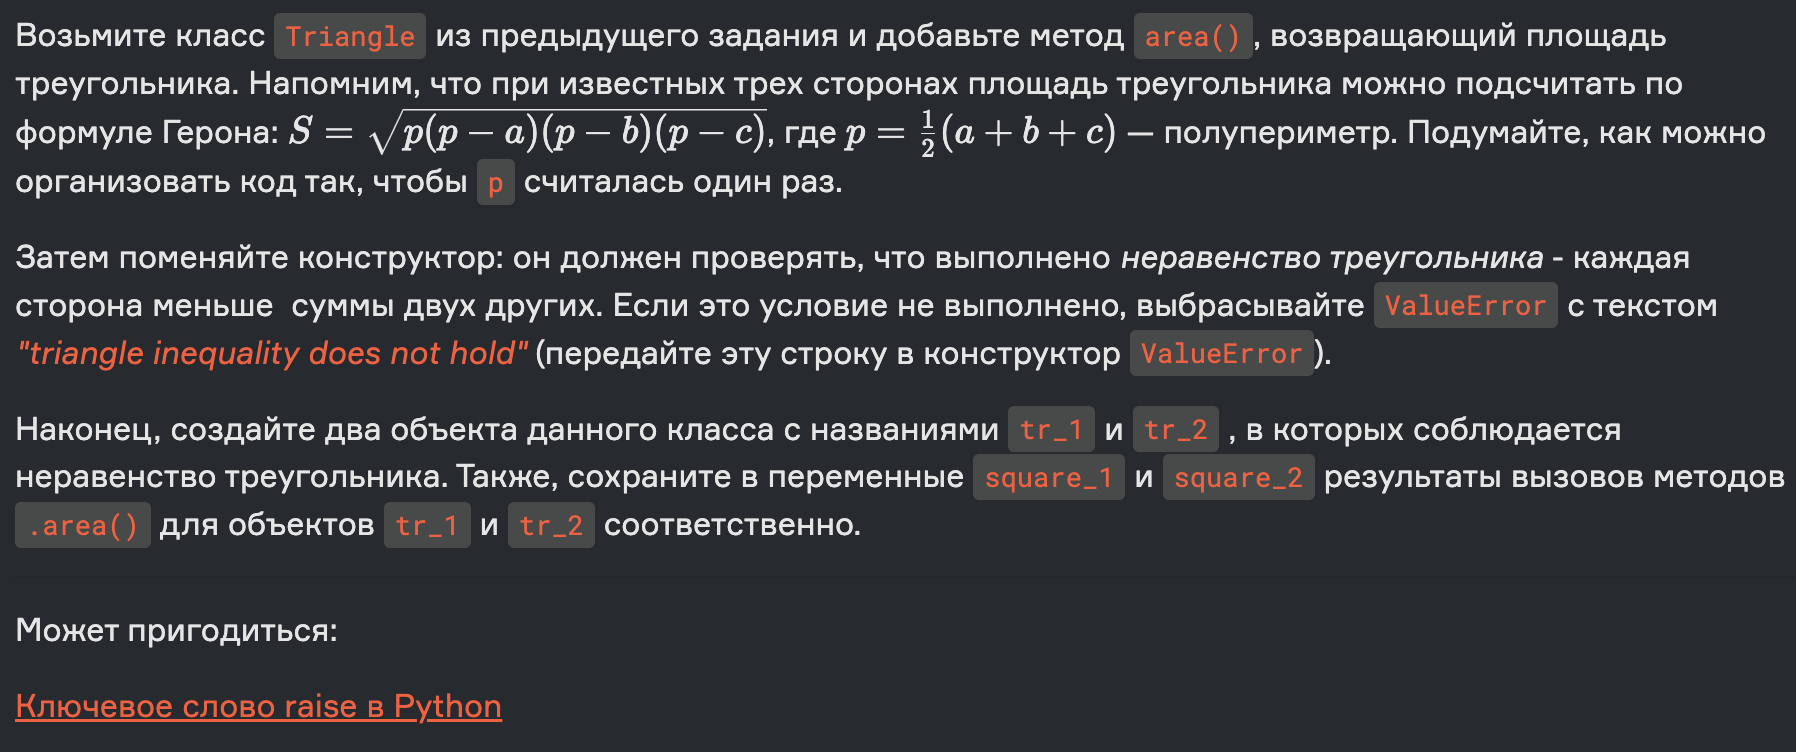

In [12]:
class Triangle:
    a: float
    b: float
    c: float
    n_dots = 3
    
    
    def __init__(self, a, b, c):
        self.a = a
        self.b = b
        self.c = c
        if( a >= (b+c) or b>=(a+c) or c>=(a+b)):
            raise ValueError('triangle inequality does not hold')
    
    def area(self):
        p = (1 / 2) * (self.a + self.b + self.c)
        s = (p * (p - self.a) * (p - self.b) * (p - self.c)) ** (1/2)
        return s

tr_1 = Triangle(5, 2, 4)
tr_2 = Triangle(4, 5, 6)

square_1 = tr_1.area()
square_2 = tr_2.area()

print(square_1, square_2)

3.799671038392666 9.921567416492215


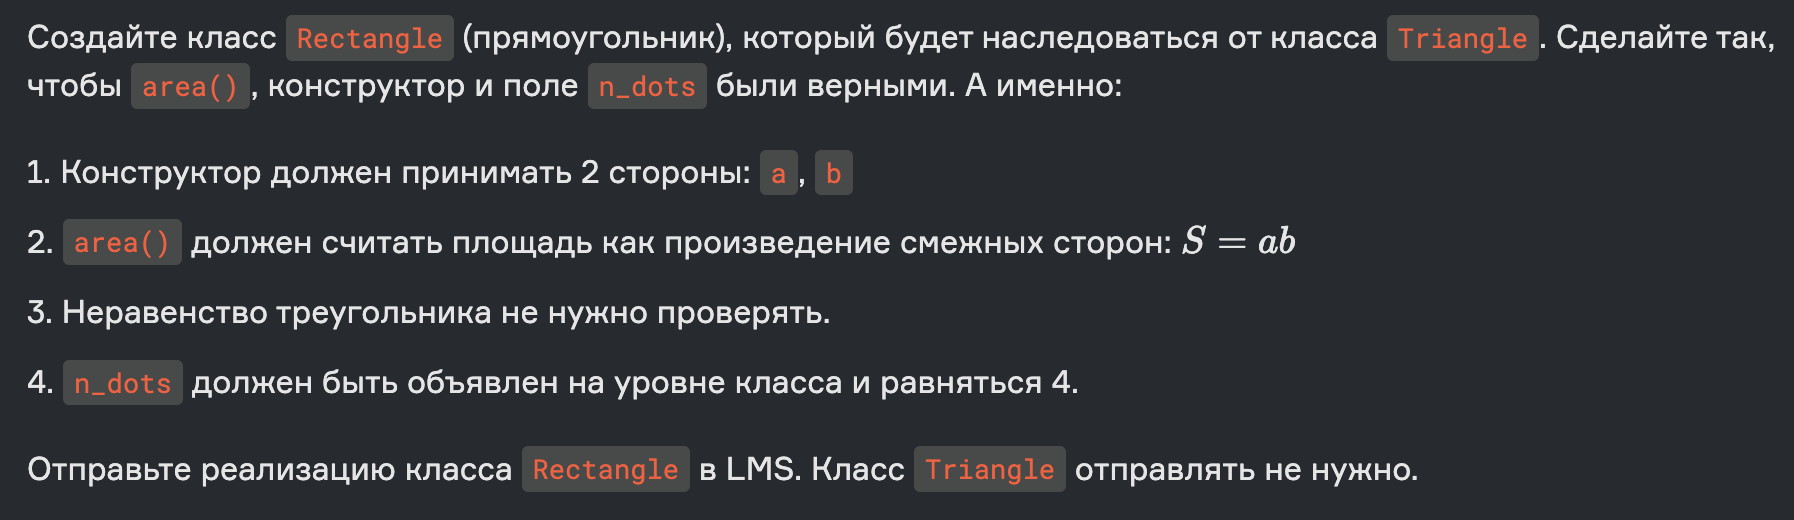

In [16]:
class Rectangle(Triangle):
    n_dots = 4
    
    def __init__(self, a, b):
        self.a = a
        self.b = b
    
    def area(self):
        s = self.a * self.b
        return s

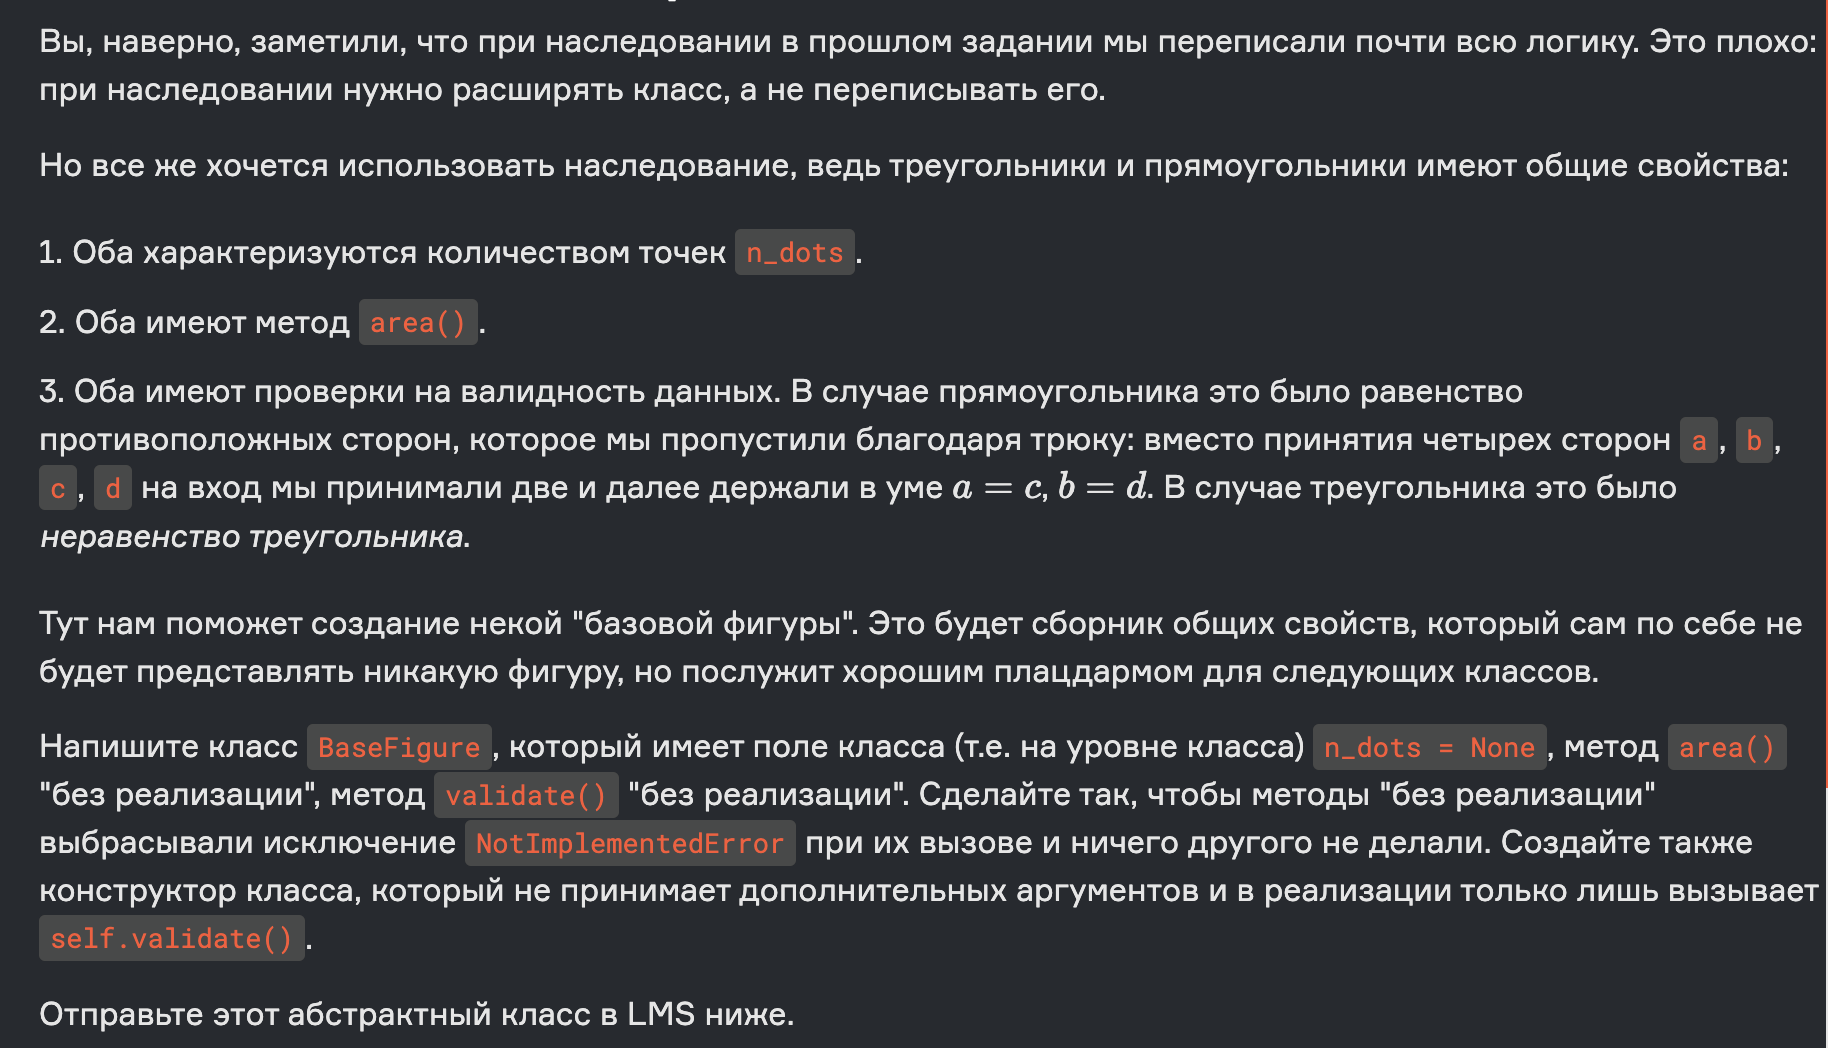

In [44]:
class BaseFigure:
    n_dots = None
    def area(self):
        raise NotImplemented()

    def validate(self):
        raise NotImplemented()

    def __init__(self):
        self.validate()


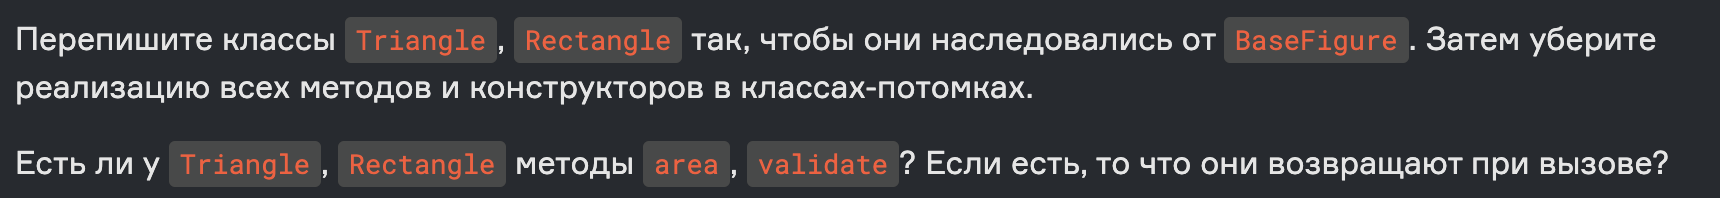

In [20]:
class Triangle(BaseFigure):
    a: float
    b: float
    c: float
    n_dots = 3
    
class Rectangle(Triangle):
    n_dots = 4
    
Rectangle.area()
# Triangle.area()

TypeError: area() missing 1 required positional argument: 'self'

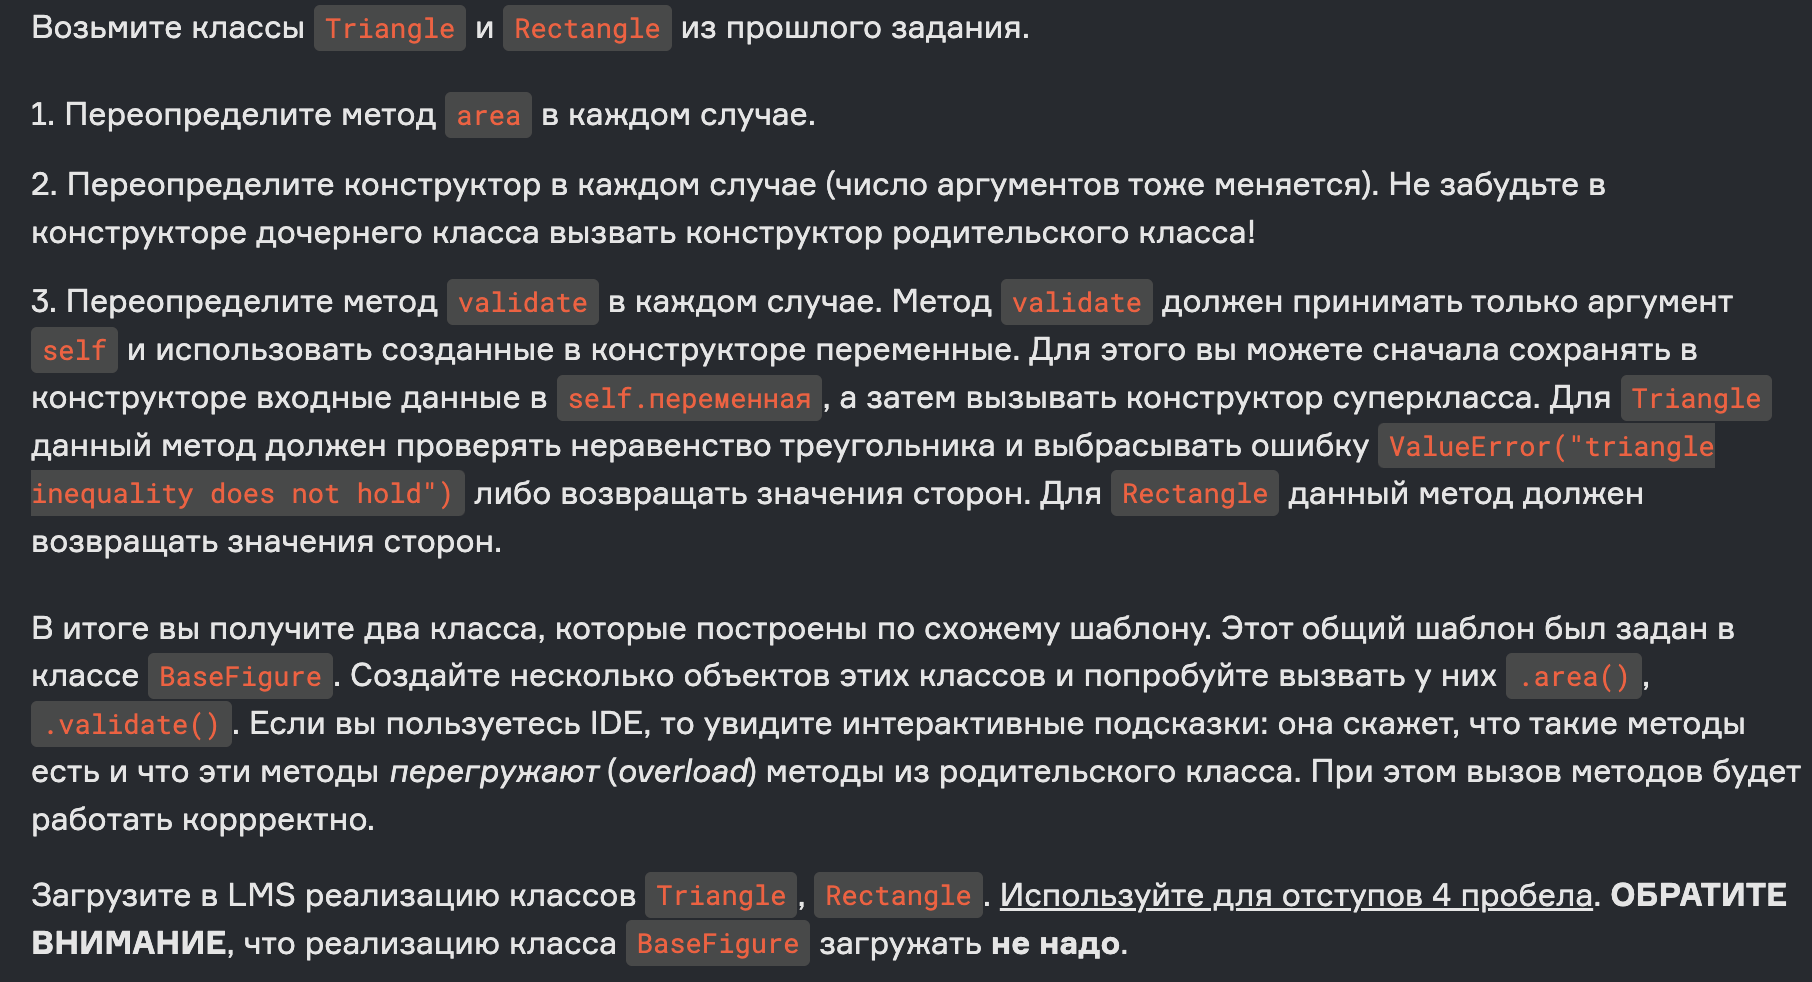

In [38]:
class Triangle(BaseFigure):
    a: float
    b: float
    c: float
    n_dots = 3
    
    
    def __init__(self, a, b, c):
        self.a = a
        self.b = b
        self.c = c
        if( a >= (b+c) or b>=(a+c) or c>=(a+b)):
            raise ValueError('triangle inequality does not hold')
        super().__init__()
    
    def area(self):
        p = (1 / 2) * (self.a + self.b + self.c)
        s = (p * (p - self.a) * (p - self.b) * (p - self.c)) ** (1/2)
        return s
    
    def validate(self):
        if( self.a >= (self.b+self.c) or self.b>=(self.a+self.c) or self.c>=(self.a+self.b)):
            raise ValueError('triangle inequality does not hold')
        else:
            return self.a, self.b, self.c
    


In [37]:
class Rectangle(BaseFigure):
    n_dots = 4
    
    def __init__(self, a, b):
        self.a = a
        self.b = b
        super().__init__()
    
    def area(self):
        s = self.a * self.b
        return s
    
    def validate(self):
        return self.a, self.b
            

In [39]:
tri = Triangle(4, 5, 6)
tri.area()
tri.validate()

(4, 5, 6)

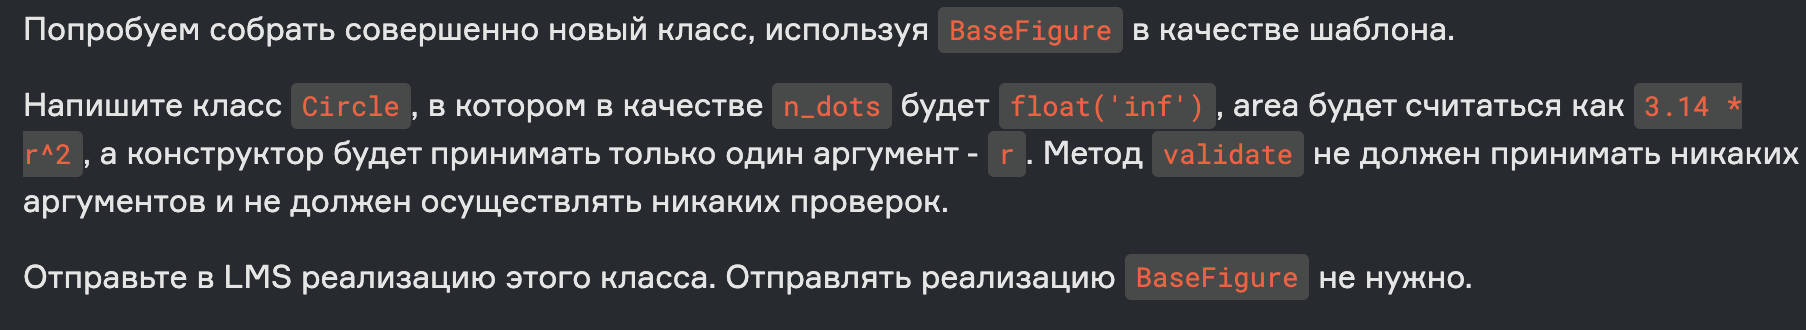

In [47]:
class Circle(BaseFigure):
    n_dots = float('inf')
    
    def __init__(self, r: float):
        self.r = r
        super().__init__()
    
    def area(self):
        return 3.14 * self.r**2
    
    def validate(self):
        pass

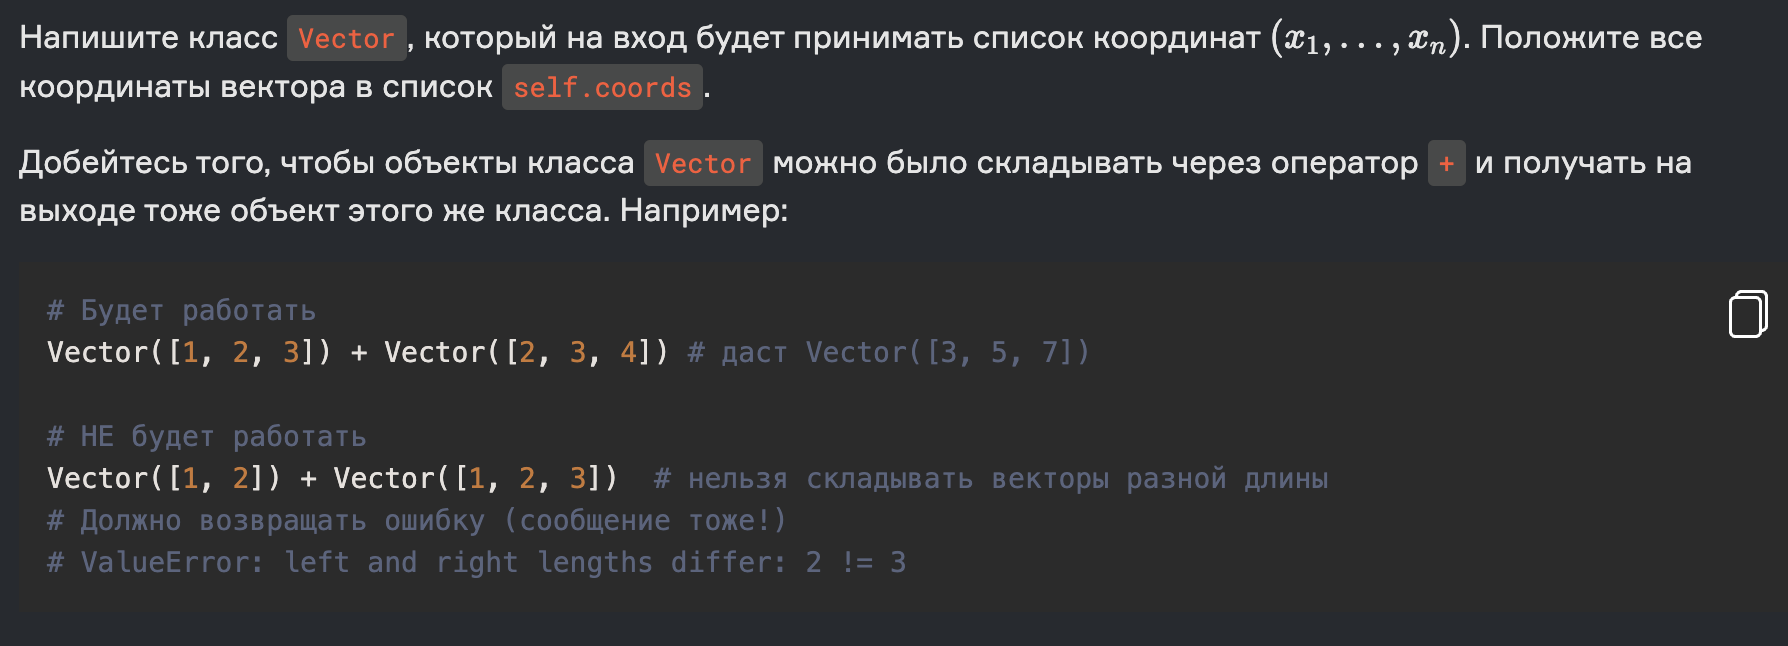

In [71]:
class Vector:
    coords: list
    
    def __init__(self, coords):
        self.coords = coords
        
    def __add__(self, other):
        if len(self.coords) != len(other.coords):
            raise ValueError(f'left and right lengths differ: {len(self.coords)} != {len(other.coords)}')
        else:
            result = [a + b for a, b in zip(self.coords, other.coords)]
            return Vector(result)

In [72]:
Vector([1, 2, 3]) + Vector([2, 3, 4])

In [73]:
Vector([1, 2]) + Vector([1, 2, 3]) 

ValueError: left and right lengths differ: 2 != 3

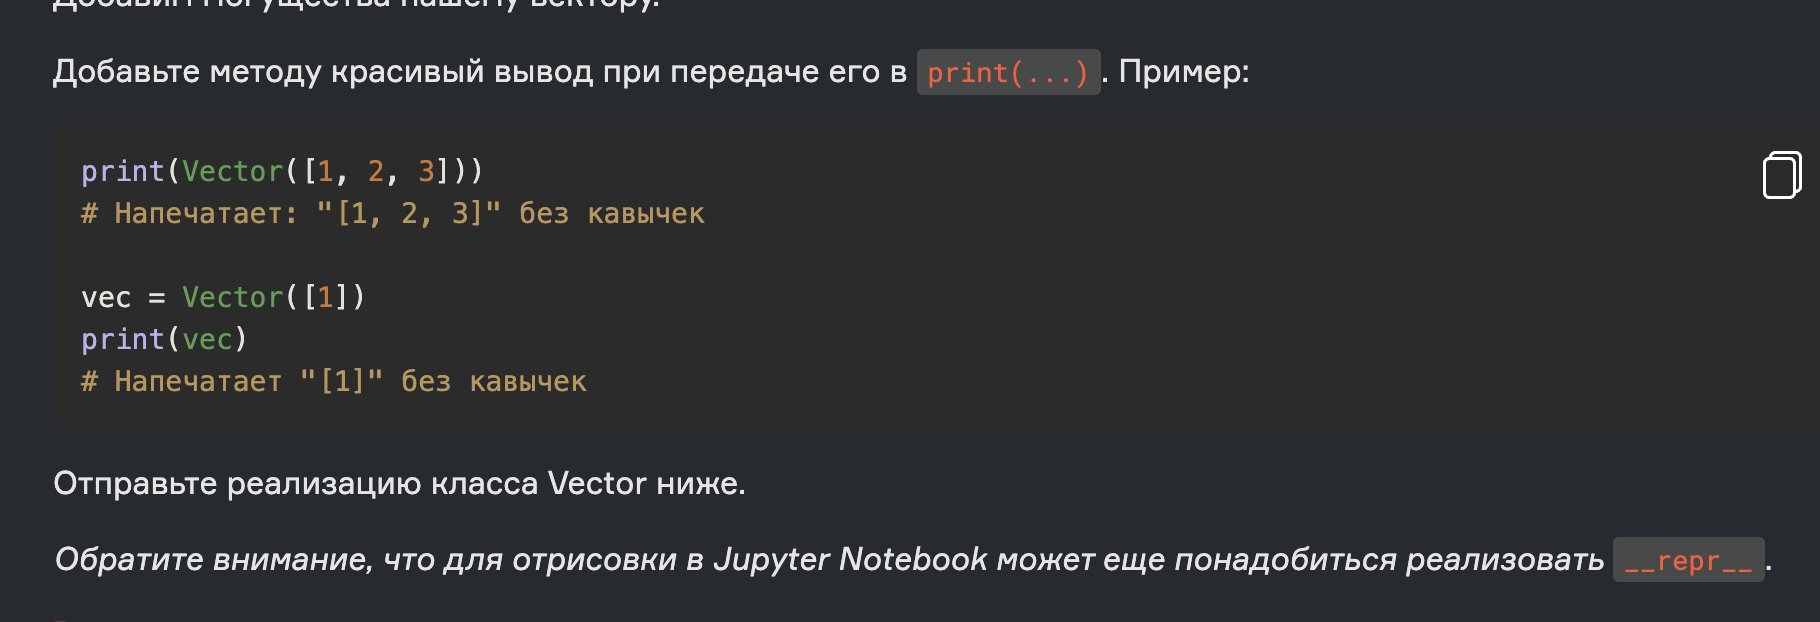

In [79]:
class Vector:
    coords: list
    
    def __init__(self, coords):
        self.coords = coords
        
    def __add__(self, other):
        if len(self.coords) != len(other.coords):
            raise ValueError(f'left and right lengths differ: {len(self.coords)} != {len(other.coords)}')
        else:
            result = [a + b for a, b in zip(self.coords, other.coords)]
            return Vector(result)
    def __str__(self):
        return str(self.coords)

    def __repr__(self):
        return f"{self.coords}"

In [80]:
Vector([1, 2, 3]) + Vector([2, 3, 4])

[3, 5, 7]

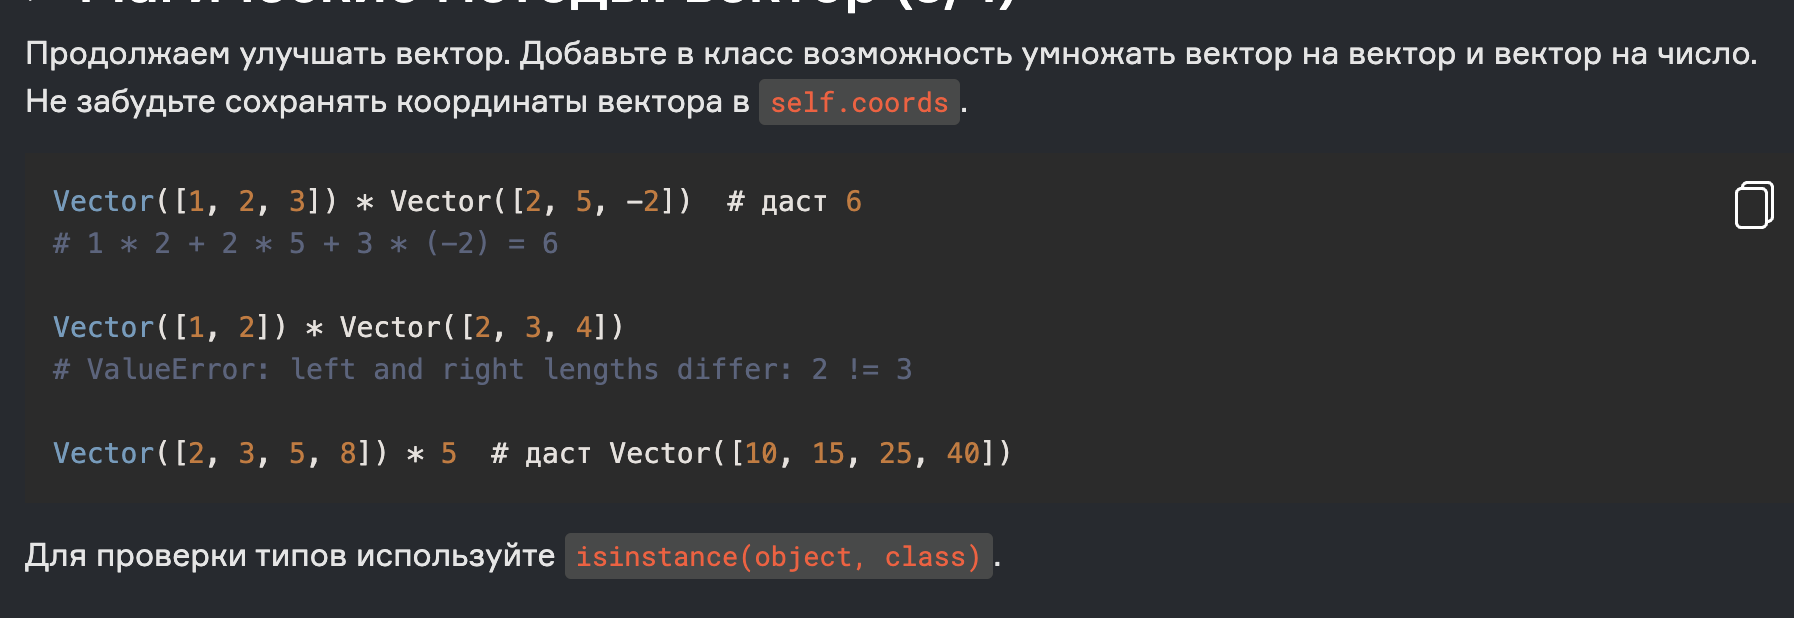

In [104]:
class Vector:
    coords: list
    
    def __init__(self, coords):
        self.coords = coords
        
    def __add__(self, other):
        if len(self.coords) != len(other.coords):
            raise ValueError(f'left and right lengths differ: {len(self.coords)} != {len(other.coords)}')
        else:
            result = [a + b for a, b in zip(self.coords, other.coords)]
            return Vector(result)
        
    def __mul__(self, other):
        if isinstance(other, Vector):
            if len(self.coords) != len(other.coords):
                raise ValueError(f'left and right lengths differ: {len(self.coords)} != {len(other.coords)}')
            else:
                return sum(a * b for a, b in zip(self.coords, other.coords))
        elif isinstance(other, (int, float)):
            return Vector([a * other for a in self.coords])
    
    def __str__(self):
        return str(self.coords)

    def __repr__(self):
        return f"{self.coords}"

In [105]:
# Vector([1, 2, 3]) * Vector([2, 5, -2])  # даст 6
# 1 * 2 + 2 * 5 + 3 * (-2) = 6

# Vector([1, 2]) * Vector([2, 3, 4])
# # ValueError: left and right lengths differ: 2 != 3

Vector([2, 3, 5, 8]) * 5  # даст Vector([10, 15, 25, 40])

90

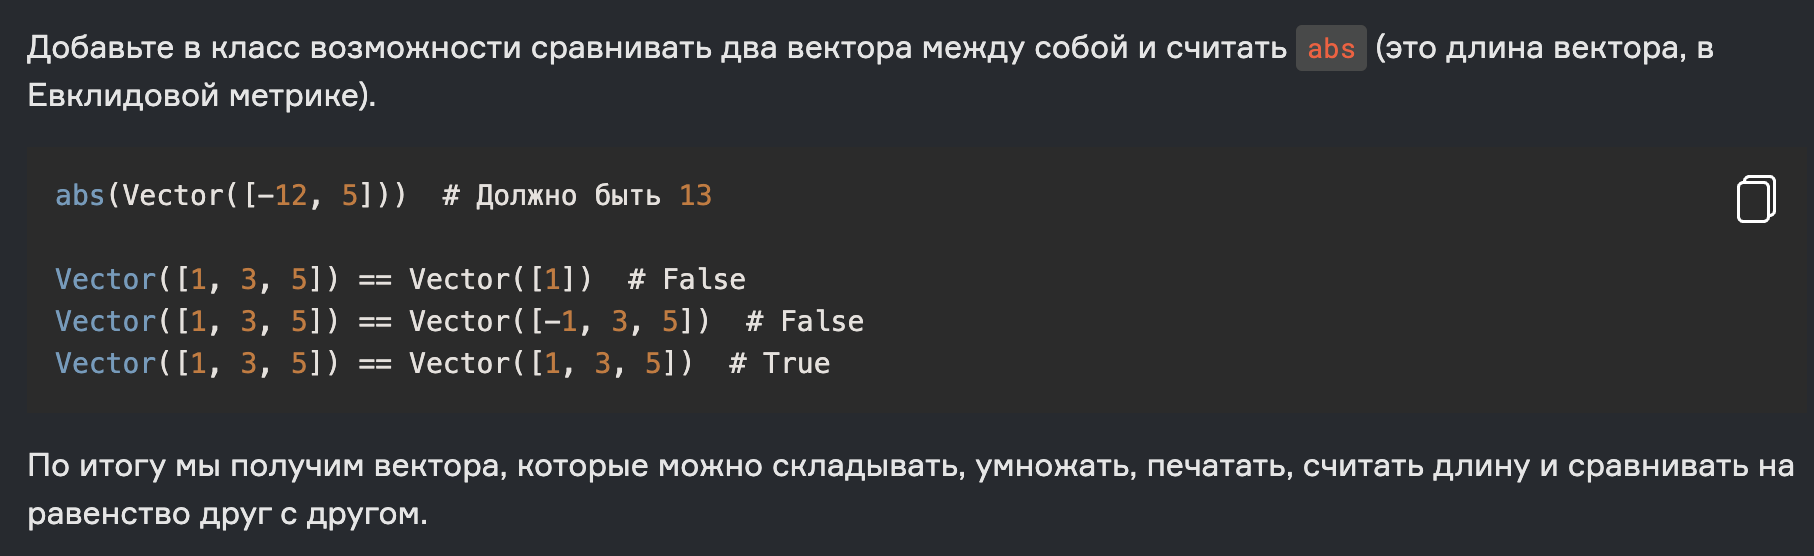

In [109]:
import math

class Vector:
    coords: list
    
    def __init__(self, coords):
        self.coords = coords
        
        
    def __add__(self, other):
        if len(self.coords) != len(other.coords):
            raise ValueError(f'left and right lengths differ: {len(self.coords)} != {len(other.coords)}')
        else:
            result = [a + b for a, b in zip(self.coords, other.coords)]
            return Vector(result)
        
    def __mul__(self, other):
        if isinstance(other, Vector):
            if len(self.coords) != len(other.coords):
                raise ValueError(f'left and right lengths differ: {len(self.coords)} != {len(other.coords)}')
            else:
                return sum(a * b for a, b in zip(self.coords, other.coords))
        elif isinstance(other, (int, float)):
            return Vector([a * other for a in self.coords])
    
    def __eq__(self, other):
        if isinstance(other, Vector):
            return self.coords == other.coords
    
    def __abs__(self):
        return math.sqrt(sum(x**2 for x in self.coords))
    
    def __str__(self):
        return str(self.coords)

    def __repr__(self):
        return f"{self.coords}"

In [114]:
#abs(Vector([-12, 5]))  # Должно быть 13

#Vector([1, 3, 5]) == Vector([1])  # False
Vector([1, 3, 5]) == Vector([-1, 3, 5])  # False
Vector([1, 3, 5]) == Vector([1, 3, 5])  # True

True

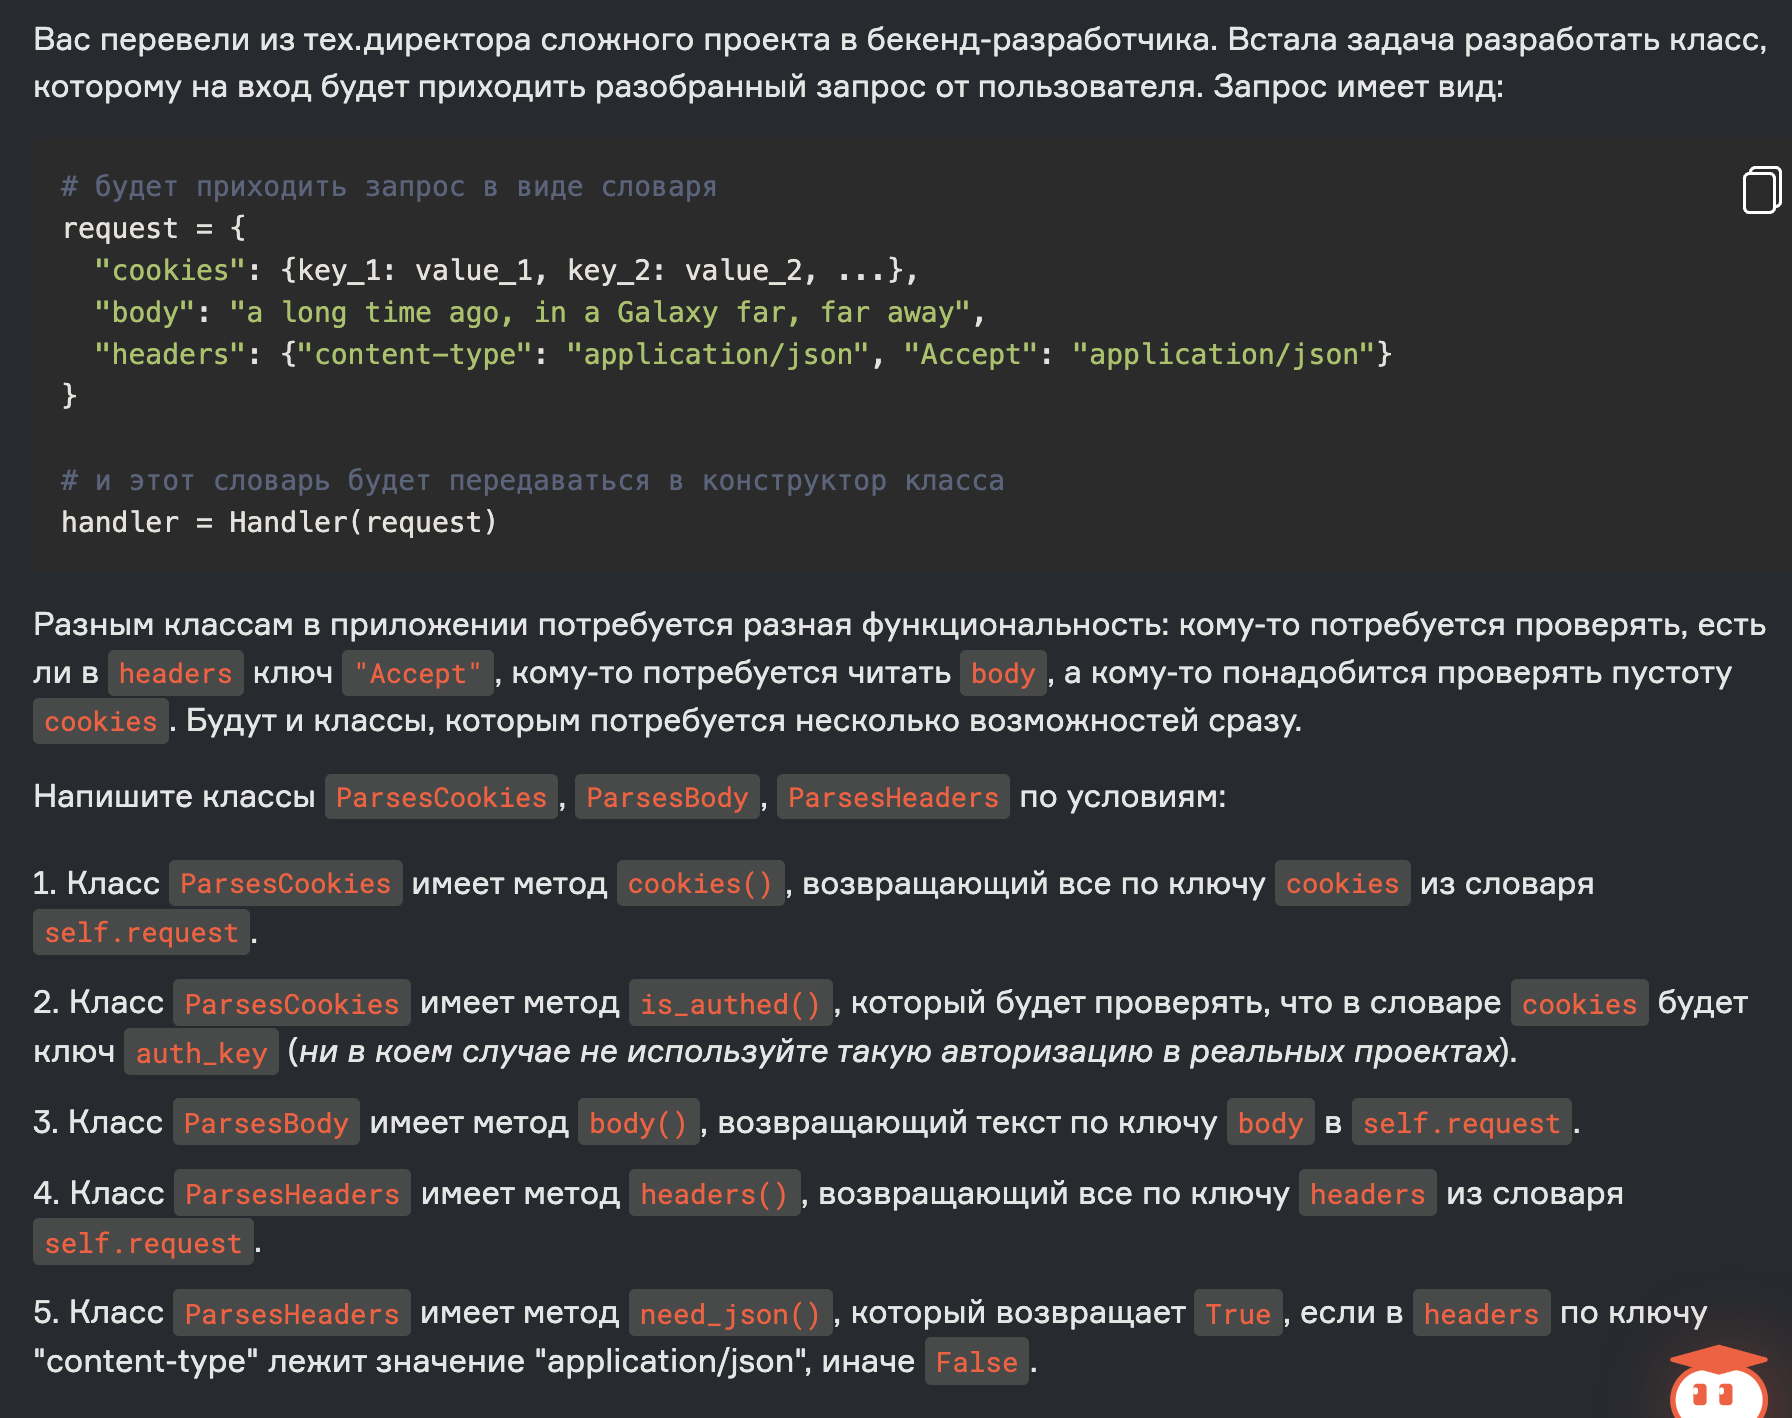

In [115]:
class Handler:
    def __init__(self, request):
        self.request = request


class ParsesCookies(Handler):
    def cookies(self):
        return self.request.get("cookies", {})

    def is_authed(self):
        return 'auth_key' in self.cookies()


class ParsesBody(Handler):
    def body(self):
        return self.request.get("body", "")


class ParsesHeaders(Handler):
    def headers(self):
        return self.request.get("headers", {})

    def need_json(self):
        headers = self.headers()
        return headers.get("content-type") == "application/json"

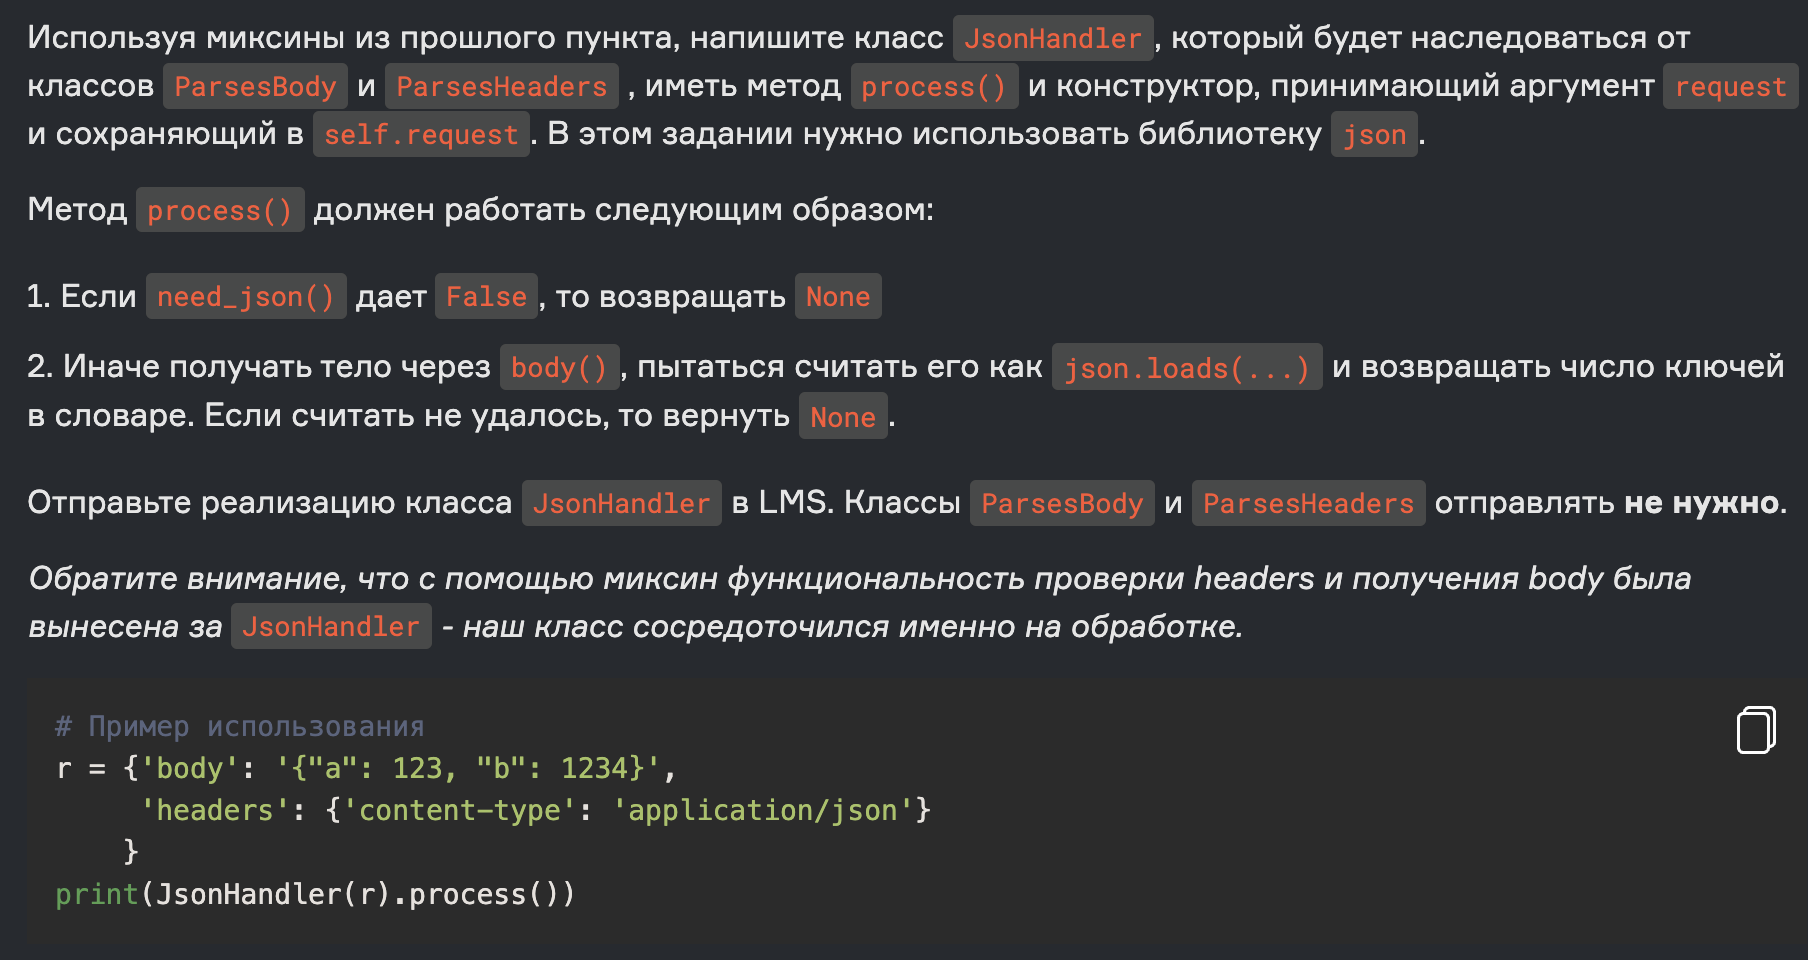

In [117]:
import json

class JsonHandler(ParsesBody, ParsesHeaders):
    def __init__(self, request):
        self.request = request
        
    def process(self):
        if self.need_json() == False:
            return None
        else:
            body_text = self.body()
            
            try:
                data = json.loads(body_text)
                if isinstance(data, dict):
                    return len(data)
            except:
                return None

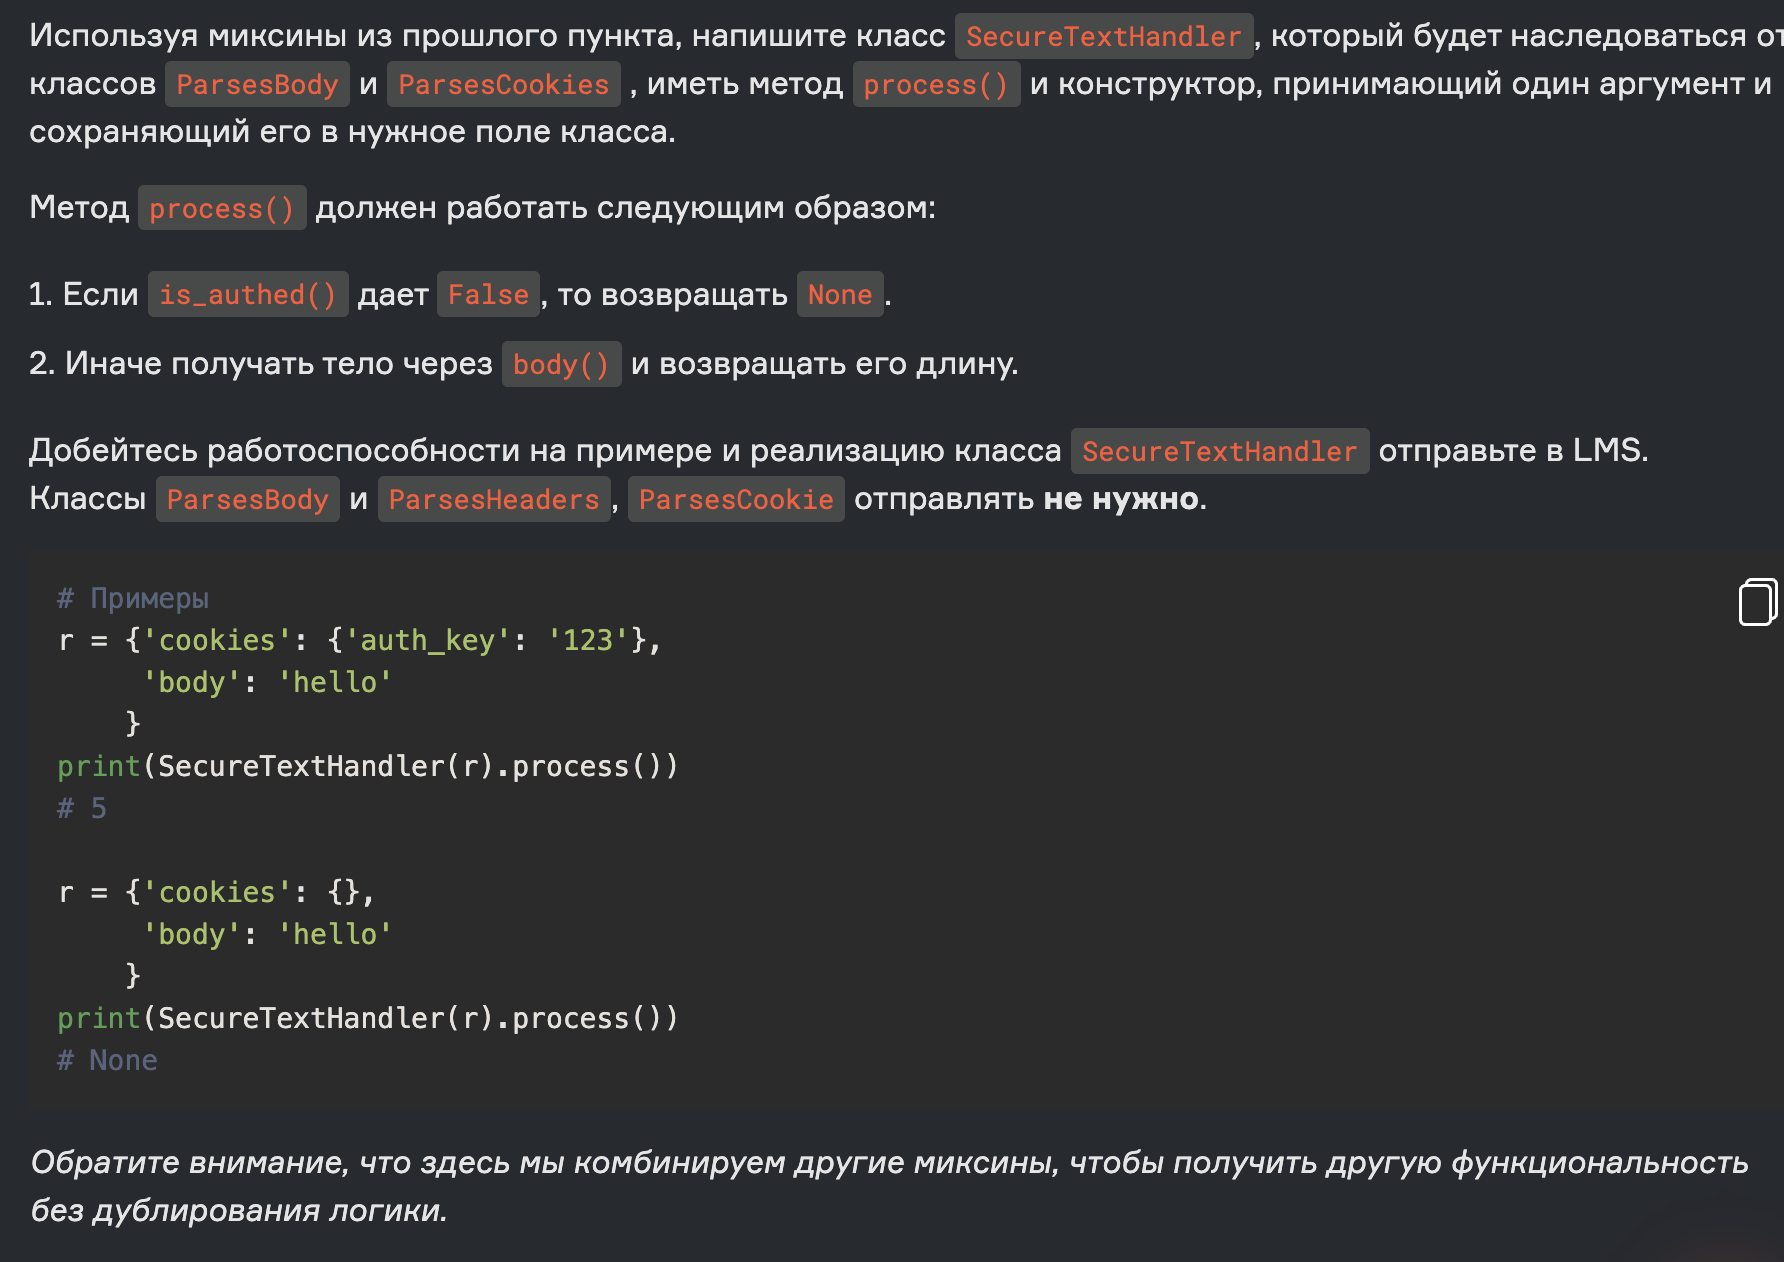

In [118]:
class SecureTextHandler(ParsesBody, ParsesCookies):
    def __init__(self, request):
        self.request = request
        
    def process(self):
        if self.is_authed() == False:
            return None
        else:
            return(len(self.body()))

In [119]:
# Примеры
r = {'cookies': {'auth_key': '123'},
     'body': 'hello'
    }
print(SecureTextHandler(r).process())
# 5

# r = {'cookies': {},
#      'body': 'hello'
#     }
# print(SecureTextHandler(r).process())
# # None

AttributeError: 'SecureTextHandler' object has no attribute 'bode'